## Exercise 2 — Lyapunov and Matrosov analysis

This exercise collects three small case studies illustrating how Lyapunov functions are used for (non)autonomous systems.

- **Task 1**: A **time-varying** Lyapunov candidate $V(t,x)$ and its total derivative $\dot V(t,x)$.
- **Task 2**: A **nonautonomous** linear system where $\dot V\le 0$ is only negative semidefinite, motivating a Matrosov-type auxiliary function.
- **Task 3**: An **autonomous** linear 3D system with a similar structure: $\dot V\le 0$ but not negative definite, so additional functions are introduced.

The code is written to be readable (and runnable) cell-by-cell, with short plots that illustrate the main point of each task.

## Task 1 — A time-varying Lyapunov function

Consider a time-varying candidate Lyapunov function
$$
V(t,x)=\phi(t)\,x_1^2+\tfrac12 x_2^2,\qquad \phi(t)>0.
$$

For a general (possibly nonautonomous) system $\dot x = f(t,x)$, the total derivative along trajectories is obtained from the chain rule:
$$
\dot V(t,x)=\frac{\partial V}{\partial t}(t,x)+\nabla_x V(t,x)^\top f(t,x).
$$

The code cell below computes these expressions symbolically and then visualizes how the level sets of $V(t,\cdot)$ change with time for an example choice of $\phi(t)$.

Lyapunov candidate:


<IPython.core.display.Math object>

Total derivative along xdot= f(t,x):


<IPython.core.display.Math object>

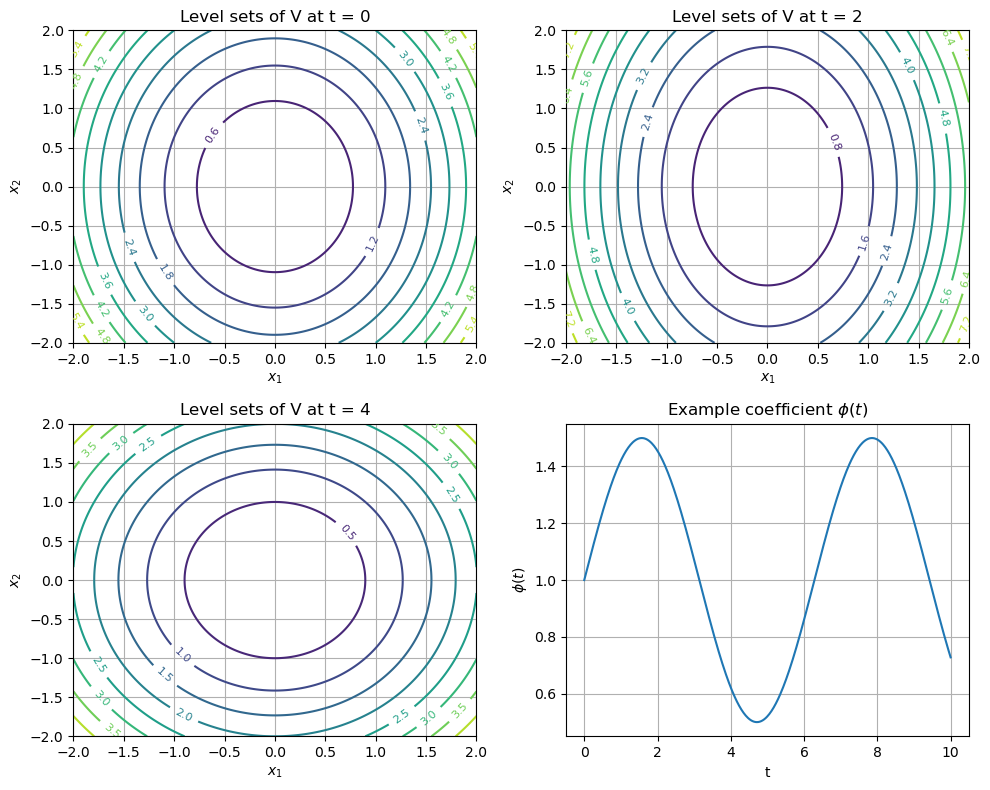

In [4]:
# Task 1 — Time-varying Lyapunov function
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math

def show(expr):
    display(Math(sp.latex(expr)))

# Symbolic setup
t = sp.symbols("t", real=True)
x1_s, x2_s = sp.symbols("x_1 x_2", real=True)

phi = sp.Function("phi")(t)
f1 = sp.Function("f_1")(t, x1_s, x2_s)
f2 = sp.Function("f_2")(t, x1_s, x2_s)

V = phi * x1_s**2 + sp.Rational(1, 2) * x2_s**2
dV_dt = sp.diff(V, t)
gradV = sp.Matrix([sp.diff(V, x1_s), sp.diff(V, x2_s)])
f = sp.Matrix([f1, f2])
V_dot = sp.simplify(dV_dt + (gradV.T * f)[0])

print("Lyapunov candidate:")
show(sp.Eq(sp.Symbol("V"), V))

print("Total derivative along xdot= f(t,x):")
show(sp.Eq(sp.Symbol(r"\dot V"), V_dot))

# A simple numeric choice for visualization (φ(t) strictly positive)
def phi_num(t_):
    return 1.0 + 0.5 * np.sin(t_)

def V_num(t_, X1, X2):
    return phi_num(t_) * X1**2 + 0.5 * X2**2

x1 = np.linspace(-2, 2, 250)
x2 = np.linspace(-2, 2, 250)
X1, X2 = np.meshgrid(x1, x2)

times = [0.0, 2.0, 4.0]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()

for ax, ti in zip(axs[:3], times):
    Vgrid = V_num(ti, X1, X2)
    cs = ax.contour(X1, X2, Vgrid, levels=10)
    ax.clabel(cs, inline=True, fontsize=8)
    ax.set_title(f"Level sets of V at t = {ti:g}")
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.grid(True)

t_vals = np.linspace(0, 10, 500)
axs[3].plot(t_vals, phi_num(t_vals))
axs[3].set_title(r"Example coefficient $\phi(t)$")
axs[3].set_xlabel("t")
axs[3].set_ylabel(r"$\phi(t)$")
axs[3].grid(True)

plt.tight_layout()
plt.show()

## Task 2 — A nonautonomous system (Lyapunov + Matrosov)

Consider the nonautonomous linear system
$$
\dot x_1 = g(t)\,x_2,\qquad
\dot x_2 = -c\,g(t)\,x_1 - x_2,\qquad c>0,
$$
where $g(t)$ is bounded and nonvanishing ($0<g_0\le |g(t)|\le g_1$).

A natural Lyapunov candidate is
$$
V_1(x)=\tfrac12 c x_1^2+\tfrac12 x_2^2.
$$
It satisfies $\dot V_1=-x_2^2\le 0$, which is *not* negative definite. To strengthen the conclusion from mere stability to asymptotic convergence, one can introduce an auxiliary (Matrosov-type) function, e.g.
$$
V_2(t,x)=\operatorname{sgn}(g(t))\,x_1x_2.
$$

The next code cell derives $\dot V_1$ symbolically, then simulates a bounded example $g(t)$ and plots $x_1(t), x_2(t)$ together with $V_1(t)$ and $V_2(t,x(t))$.

Candidate V1:


<IPython.core.display.Math object>

Derivative along trajectories:


<IPython.core.display.Math object>

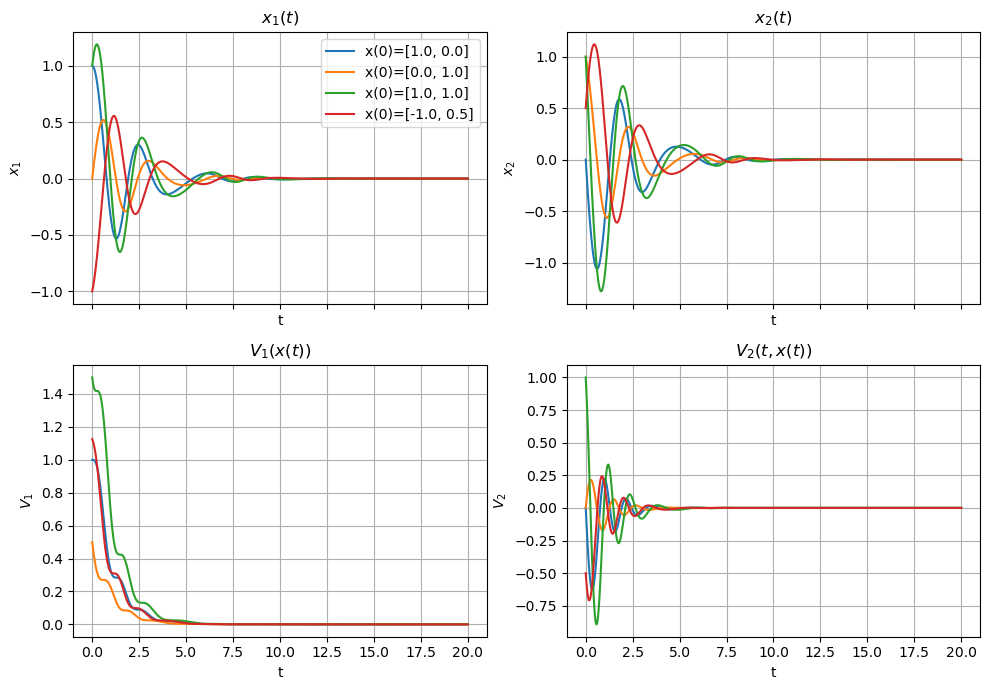

In [5]:
# Task 2 — Nonautonomous system (Lyapunov + Matrosov)
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math
from scipy.integrate import solve_ivp

def show(expr):
    display(Math(sp.latex(expr)))

# Symbolic Lyapunov derivative
t = sp.symbols("t", real=True)
x1_s, x2_s, c_s = sp.symbols("x_1 x_2 c", real=True, positive=True)
g = sp.Function("g")(t)

x1_dot = g * x2_s
x2_dot = -c_s * g * x1_s - x2_s

V1 = sp.Rational(1, 2) * c_s * x1_s**2 + sp.Rational(1, 2) * x2_s**2
V1_dot = sp.simplify(sp.diff(V1, x1_s) * x1_dot + sp.diff(V1, x2_s) * x2_dot)

print("Candidate V1:")
show(sp.Eq(sp.Symbol("V_1"), V1))
print("Derivative along trajectories:")
show(sp.Eq(sp.Symbol(r"\dot V_1"), V1_dot))

# Numeric example
c = 2.0

def g_num(t_):
    # bounded and nonvanishing: g(t) ∈ [1, 2]
    return 1.5 + 0.5 * np.sin(t_)

def f_nonauto(t_, x):
    x1, x2 = x
    gt = g_num(t_)
    return [gt * x2, -c * gt * x1 - x2]

def V1_num(x):
    x1, x2 = x
    return 0.5 * c * x1**2 + 0.5 * x2**2

def V2_num(t_, x):
    x1, x2 = x
    return np.sign(g_num(t_)) * x1 * x2

t_span = (0.0, 20.0)
t_eval = np.linspace(*t_span, 1500)
initial_conditions = [[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [-1.0, 0.5]]

solutions = [solve_ivp(f_nonauto, t_span, x0, t_eval=t_eval) for x0 in initial_conditions]

fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
axs = axs.ravel()

for sol, x0 in zip(solutions, initial_conditions):
    axs[0].plot(sol.t, sol.y[0], label=f"x(0)={x0}")
    axs[1].plot(sol.t, sol.y[1])
    V1_vals = np.array([V1_num(sol.y[:, i]) for i in range(sol.y.shape[1])])
    V2_vals = np.array([V2_num(sol.t[i], sol.y[:, i]) for i in range(sol.y.shape[1])])
    axs[2].plot(sol.t, V1_vals)
    axs[3].plot(sol.t, V2_vals)

axs[0].set_title(r"$x_1(t)$")
axs[1].set_title(r"$x_2(t)$")
axs[2].set_title(r"$V_1(x(t))$")
axs[3].set_title(r"$V_2(t,x(t))$")

axs[0].set_ylabel(r"$x_1$")
axs[1].set_ylabel(r"$x_2$")
axs[2].set_ylabel(r"$V_1$")
axs[3].set_ylabel(r"$V_2$")

for ax in axs:
    ax.grid(True)
    ax.set_xlabel("t")

axs[0].legend(loc="best")
plt.tight_layout()
plt.show()

## Task 3 — An autonomous 3D system (Matrosov-type construction)

Consider the autonomous linear system
$$
\dot x_1 = x_2 + x_3,\qquad
\dot x_2 = -x_1 + x_3,\qquad
\dot x_3 = -x_1 - x_2 - x_3.
$$

A standard quadratic Lyapunov candidate is
$$
V_1(x)=\tfrac12\,(x_1^2+x_2^2+x_3^2).
$$
Its derivative along trajectories becomes $\dot V_1=-x_3^2\le 0$, again only negative semidefinite. A Matrosov-type approach introduces additional functions (for example $V_2$ and $V_3$ below) to rule out nontrivial invariant sets and conclude asymptotic convergence.

The code cell below:
- computes the symbolic expressions ($V_1,\dot V_1,V_2,\dot V_2,V_3,\dot V_3$),
- simulates a few trajectories,
- shows a single figure with $x_1,x_2,x_3$ and $V_1$ versus time.

System matrix A:


<IPython.core.display.Math object>

Eigenvalues of A:


<IPython.core.display.Math object>

V1 and V̇1:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Auxiliary functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

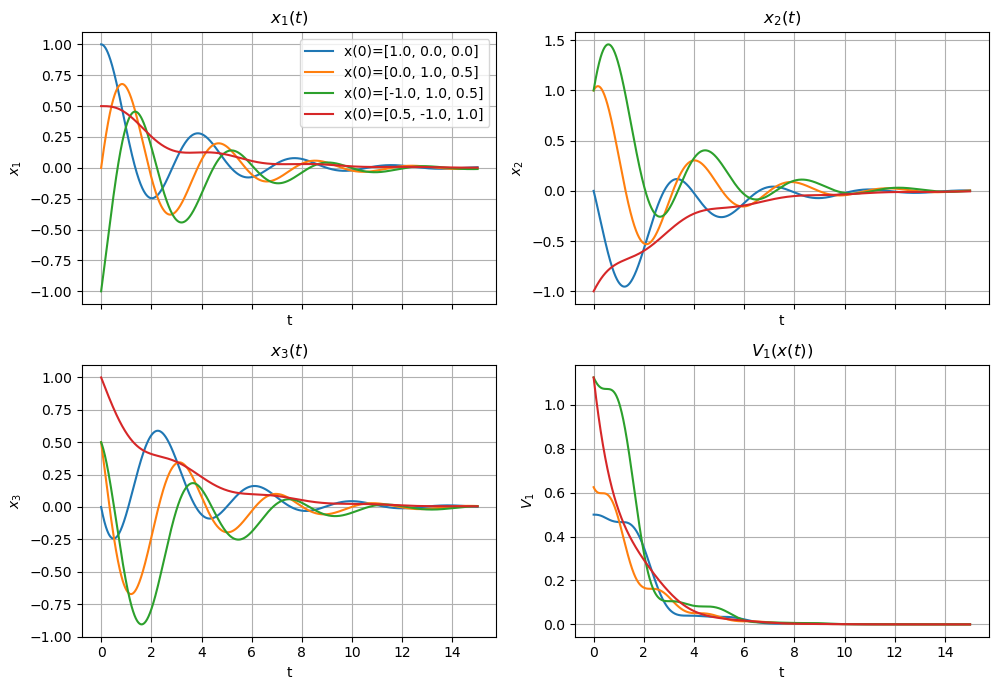

In [ ]:
# Task 3 — Autonomous system (Lyapunov + auxiliary functions)
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math
from scipy.integrate import solve_ivp

def show(expr):
    display(Math(sp.latex(expr)))

# Symbolic expressions
x1_s, x2_s, x3_s = sp.symbols("x_1 x_2 x_3", real=True)

A = sp.Matrix([[0, 1, 1], [-1, 0, 1], [-1, -1, -1]])
print("System matrix A:")
show(A)

print("Eigenvalues of A:")
show(A.eigenvals())

dx1 = x2_s + x3_s
dx2 = -x1_s + x3_s
dx3 = -x1_s - x2_s - x3_s

V1 = sp.Rational(1, 2) * (x1_s**2 + x2_s**2 + x3_s**2)
V1_dot = sp.simplify(sp.diff(V1, x1_s) * dx1 + sp.diff(V1, x2_s) * dx2 + sp.diff(V1, x3_s) * dx3)

print("V1 and Vdot1:")
show(sp.Eq(sp.Symbol("V_1"), V1))
show(sp.Eq(sp.Symbol(r"\dot V_1"), V1_dot))

V2 = x1_s * x3_s + sp.Rational(1, 2) * x1_s**2
V3 = x2_s * x3_s + sp.Rational(1, 2) * x2_s**2

V2_dot = sp.simplify(sp.diff(V2, x1_s) * dx1 + sp.diff(V2, x2_s) * dx2 + sp.diff(V2, x3_s) * dx3)
V3_dot = sp.simplify(sp.diff(V3, x1_s) * dx1 + sp.diff(V3, x2_s) * dx2 + sp.diff(V3, x3_s) * dx3)

print("Auxiliary functions:")
show(sp.Eq(sp.Symbol("V_2"), V2))
show(sp.Eq(sp.Symbol(r"\dot V_2"), V2_dot))
show(sp.Eq(sp.Symbol("V_3"), V3))
show(sp.Eq(sp.Symbol(r"\dot V_3"), sp.expand(V3_dot)))

# Numeric simulation
def f_autonomous(t_, x):
    x1, x2, x3 = x
    return [x2 + x3, -x1 + x3, -x1 - x2 - x3]

def V1_num(x):
    x1, x2, x3 = x
    return 0.5 * (x1**2 + x2**2 + x3**2)

t_span = (0.0, 15.0)
t_eval = np.linspace(*t_span, 1500)
initial_conditions = [[1.0, 0.0, 0.0], [0.0, 1.0, 0.5], [-1.0, 1.0, 0.5], [0.5, -1.0, 1.0]]

solutions = [solve_ivp(f_autonomous, t_span, x0, t_eval=t_eval) for x0 in initial_conditions]

fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
axs = axs.ravel()

for sol, x0 in zip(solutions, initial_conditions):
    axs[0].plot(sol.t, sol.y[0], label=f"x(0)={x0}")
    axs[1].plot(sol.t, sol.y[1])
    axs[2].plot(sol.t, sol.y[2])
    V_vals = np.array([V1_num(sol.y[:, i]) for i in range(sol.y.shape[1])])
    axs[3].plot(sol.t, V_vals)

axs[0].set_title(r"$x_1(t)$")
axs[1].set_title(r"$x_2(t)$")
axs[2].set_title(r"$x_3(t)$")
axs[3].set_title(r"$V_1(x(t))$")

axs[0].set_ylabel(r"$x_1$")
axs[1].set_ylabel(r"$x_2$")
axs[2].set_ylabel(r"$x_3$")
axs[3].set_ylabel(r"$V_1$")

for ax in axs:
    ax.grid(True)
    ax.set_xlabel("t")

axs[0].legend(loc="best")
plt.tight_layout()
plt.show()